In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use('seaborn-white')

# Load the Data

In [2]:
data = "./ECA_blended_custom/TG_STAID002759.txt"
df = pd.read_csv(data, index_col=[1], parse_dates=True)
df

,SouID,Temp,Q_Temp
Date,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0
...,...,...,...
2022-09-26,111448,136,0
2022-09-27,111448,112,0
2022-09-28,111448,94,0


# Explore and clean the data

In [3]:
df["Temp"] = df["Temp"].div(10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53599 entries, 1876-01-01 to 2022-09-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SouID   53599 non-null  int64  
 1   Temp    53599 non-null  float64
 2   Q_Temp  53599 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


In [5]:
df.describe()

,SouID,Temp,Q_Temp
count,53599.000000,53599.000000,53599.000000
mean,119321.941380,5.743684,0.032762
std,8023.234672,61.275654,0.541885
min,111448.000000,-999.900000,0.000000
25%,111448.000000,3.300000,0.000000
50%,111448.000000,9.400000,0.000000
75%,127488.000000,15.800000,0.000000
max,128124.000000,30.500000,9.000000


In [6]:
df["Q_Temp"].value_counts()
# 23-27 Q_temp : Quality code for temp (0='valid'; 1='suspect'; 9='missing')

0    53403
9      195
1        1
Name: Q_Temp, dtype: int64

In [7]:
df[df['Q_Temp']==9]

,SouID,Temp,Q_Temp
Date,,,
1945-04-25,127488,-999.9,9
1945-04-26,127488,-999.9,9
1945-04-27,127488,-999.9,9
1945-04-28,127488,-999.9,9
1945-04-29,127488,-999.9,9
...,...,...,...
1945-11-01,127488,-999.9,9
1945-11-02,127488,-999.9,9
1945-11-03,127488,-999.9,9


In [8]:
df1 = df.loc["1950-01-01":]
df1

,SouID,Temp,Q_Temp
Date,,,
1950-01-01,111448,-3.5,0
1950-01-02,111448,1.0,0
1950-01-03,111448,2.9,0
1950-01-04,111448,-0.1,0
1950-01-05,111448,-3.0,0
...,...,...,...
2022-09-26,111448,13.6,0
2022-09-27,111448,11.2,0
2022-09-28,111448,9.4,0


# Plot the data

<AxesSubplot:xlabel='Date'>

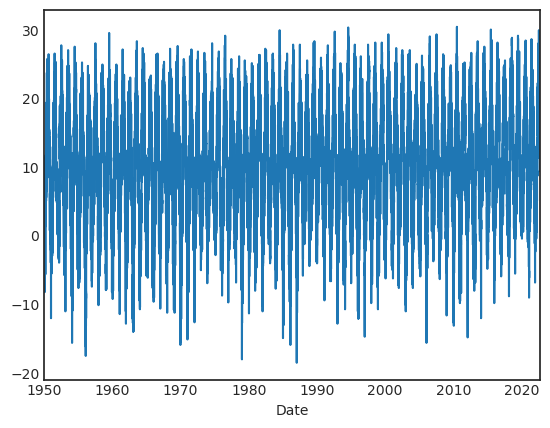

In [9]:
df1['Temp'].plot()

In [10]:
df1 = df1[df1['Q_Temp'] == 0] 
df1["Q_Temp"].value_counts()

0    26571
Name: Q_Temp, dtype: int64

In [11]:
df1["SouID"].unique()

array([111448])

In [12]:
df1.isna().sum()

SouID     0
Temp      0
Q_Temp    0
dtype: int64

Text(0.5, 1.0, 'Temp. °C over years')

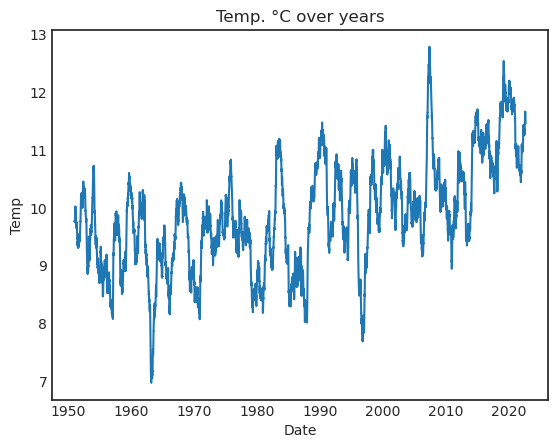

In [13]:
sns.lineplot(x="Date", y="Temp", data=df1.rolling(365).mean())
plt.title("Temp. °C over years")

In [14]:
#fig, axs = plt.subplots(nrows=2, figsize=(20, 5))
#sns.lineplot(x="Date", y="Temp", data=df1.rolling(90).max(), ax=axs[0])
#sns.lineplot(x="Date", y="Temp", data=df1.rolling(90).min(), ax=axs[1])
#plt.title("Temp. °C over years")

# Model the Trend

In [15]:
df1['timestep'] = range(len(df1))
df1

,SouID,Temp,Q_Temp,timestep
Date,,,,
1950-01-01,111448,-3.5,0,0
1950-01-02,111448,1.0,0,1
1950-01-03,111448,2.9,0,2
1950-01-04,111448,-0.1,0,3
1950-01-05,111448,-3.0,0,4
...,...,...,...,...
2022-09-26,111448,13.6,0,26566
2022-09-27,111448,11.2,0,26567
2022-09-28,111448,9.4,0,26568


In [16]:
X = df1[['timestep']]
y = df1['Temp']

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
m = LinearRegression()

In [19]:
m.fit(X,y)

LinearRegression()

In [20]:
df1['trend'] = m.predict(X)
df1['trend']

Date
1950-01-01     8.844459
1950-01-02     8.844538
1950-01-03     8.844617
1950-01-04     8.844695
1950-01-05     8.844774
                ...    
2022-09-26    10.936311
2022-09-27    10.936389
2022-09-28    10.936468
2022-09-29    10.936547
2022-09-30    10.936626
Name: trend, Length: 26571, dtype: float64

<AxesSubplot:xlabel='Date'>

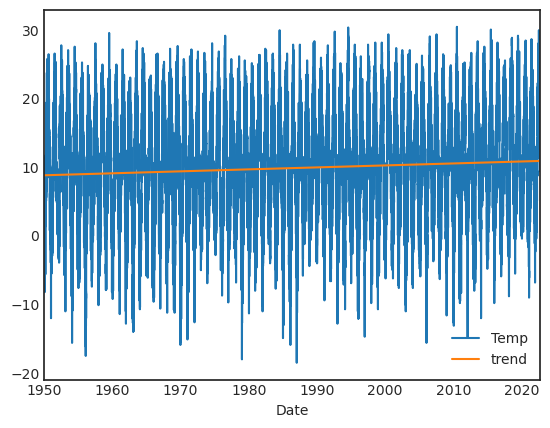

In [21]:
df1[['Temp','trend']].plot()

In [22]:
m.intercept_,m.coef_

(8.844459032002357, array([7.87416853e-05]))

<AxesSubplot:xlabel='Date'>

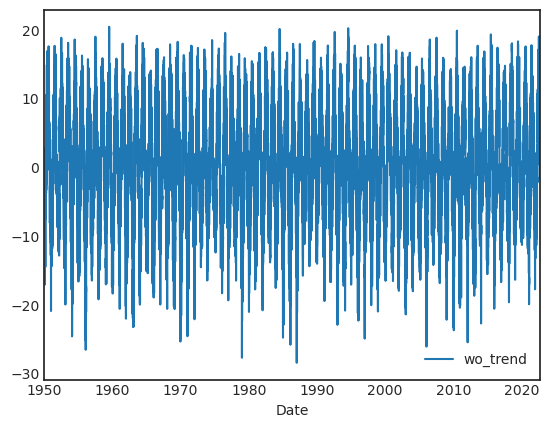

In [23]:
df1['wo_trend'] = df1['Temp'] - df1['trend']
df1[['wo_trend']].plot()

# Model the seasonality

In [24]:
df1['month'] = df1.index.month
df1

,SouID,Temp,Q_Temp,timestep,trend,wo_trend,month
Date,,,,,,,
1950-01-01,111448,-3.5,0,0,8.844459,-12.344459,1
1950-01-02,111448,1.0,0,1,8.844538,-7.844538,1
1950-01-03,111448,2.9,0,2,8.844617,-5.944617,1
1950-01-04,111448,-0.1,0,3,8.844695,-8.944695,1
1950-01-05,111448,-3.0,0,4,8.844774,-11.844774,1
...,...,...,...,...,...,...,...
2022-09-26,111448,13.6,0,26566,10.936311,2.663689,9
2022-09-27,111448,11.2,0,26567,10.936389,0.263611,9
2022-09-28,111448,9.4,0,26568,10.936468,-1.536468,9


<AxesSubplot:xlabel='month'>

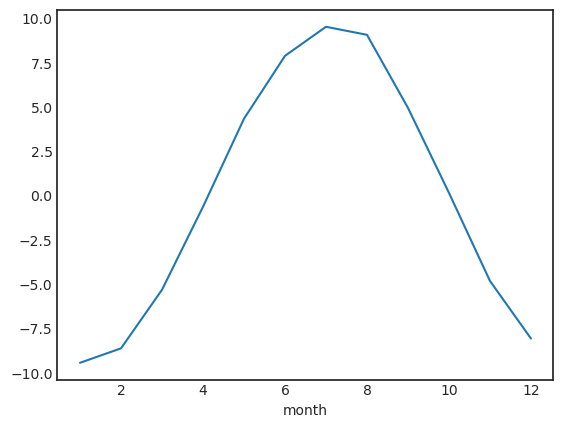

In [25]:
df1.groupby('month')['wo_trend'].mean().plot()

<AxesSubplot:xlabel='month'>

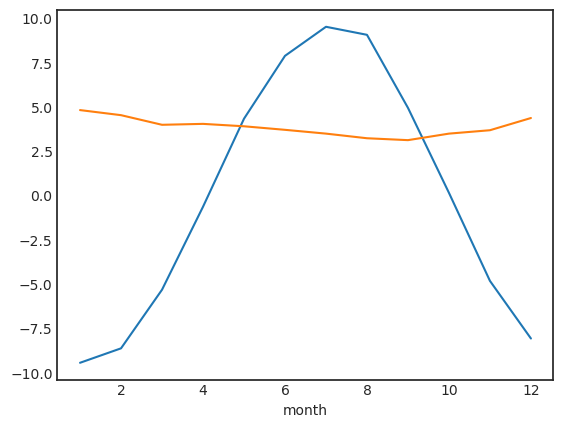

In [26]:
df1.groupby('month')['wo_trend'].mean().plot()
df1.groupby('month')['wo_trend'].std().plot()

In [27]:
month_dummies = pd.get_dummies(df1['month'],prefix='month_',drop_first=True)
month_dummies

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
Date,,,,,,,,,,,
1950-01-01,0,0,0,0,0,0,0,0,0,0,0
1950-01-02,0,0,0,0,0,0,0,0,0,0,0
1950-01-03,0,0,0,0,0,0,0,0,0,0,0
1950-01-04,0,0,0,0,0,0,0,0,0,0,0
1950-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0,0,0,0,0,0,0,1,0,0,0
2022-09-27,0,0,0,0,0,0,0,1,0,0,0
2022-09-28,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='Date'>

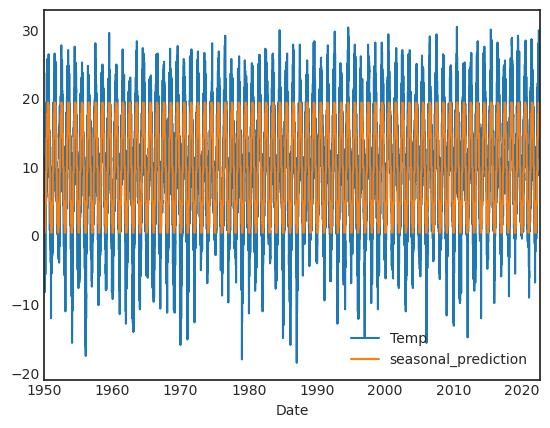

In [28]:
X = month_dummies
y= df1['Temp']
m.fit(X,y)
df1['seasonal_prediction'] = m.predict(X)
df1[['Temp','seasonal_prediction']].plot()

In [29]:
X = X.join(df1['timestep'])
X

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,timestep
Date,,,,,,,,,,,,
1950-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1950-01-02,0,0,0,0,0,0,0,0,0,0,0,1
1950-01-03,0,0,0,0,0,0,0,0,0,0,0,2
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,3
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0,0,0,0,0,0,0,1,0,0,0,26566
2022-09-27,0,0,0,0,0,0,0,1,0,0,0,26567
2022-09-28,0,0,0,0,0,0,0,1,0,0,0,26568


In [30]:
m.fit(X,y)
df1['trend_seasonal'] = m.predict(X)
df1

,SouID,Temp,Q_Temp,timestep,trend,wo_trend,month,seasonal_prediction,trend_seasonal
Date,,,,,,,,,
1950-01-01,111448,-3.5,0,0,8.844459,-12.344459,1,0.468228,-0.488925
1950-01-02,111448,1.0,0,1,8.844538,-7.844538,1,0.468228,-0.488852
1950-01-03,111448,2.9,0,2,8.844617,-5.944617,1,0.468228,-0.488780
1950-01-04,111448,-0.1,0,3,8.844695,-8.944695,1,0.468228,-0.488707
1950-01-05,111448,-3.0,0,4,8.844774,-11.844774,1,0.468228,-0.488634
...,...,...,...,...,...,...,...,...,...
2022-09-26,111448,13.6,0,26566,10.936311,2.663689,9,14.871735,15.828561
2022-09-27,111448,11.2,0,26567,10.936389,0.263611,9,14.871735,15.828634
2022-09-28,111448,9.4,0,26568,10.936468,-1.536468,9,14.871735,15.828706


<AxesSubplot:xlabel='Date'>

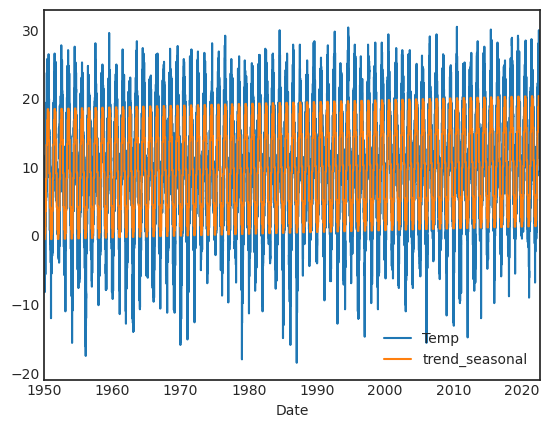

In [31]:
df1[['Temp','trend_seasonal']].plot()

In [32]:
m.coef_,m.intercept_

(array([8.15602539e-01, 4.12255914e+00, 8.80433322e+00, 1.37722997e+01,
        1.73198522e+01, 1.89600870e+01, 1.85068829e+01, 1.43858569e+01,
        9.58911640e+00, 4.62134467e+00, 1.37038894e+00, 7.27105744e-05]),
 -0.48892502102648194)

In [33]:
m.score(X,y) # R2 score

0.7535529286058174

# Extracting the Remainder

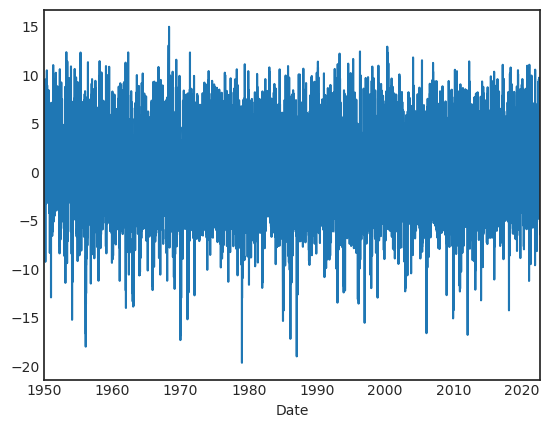

In [34]:
df1['remainder'] = df1.Temp - df1.trend_seasonal
# plot

df1.remainder.plot()

# save remainder as csv
df1.remainder.to_csv('Temperature_remainder.csv')

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
df2 = pd.read_csv("Temperature_remainder.csv", index_col=[0], parse_dates=True)
df2.head()

,remainder
Date,
1950-01-01,-3.011075
1950-01-02,1.488852
1950-01-03,3.388780
1950-01-04,0.388707
1950-01-05,-2.511366


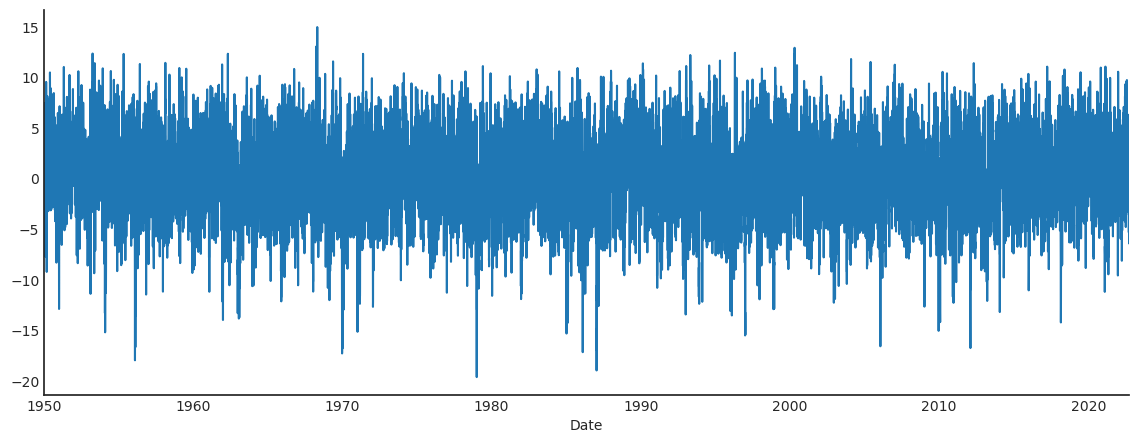

In [37]:
df2['remainder'].plot(figsize=(14,5))
sns.despine()

# Modeling the Remainder (Autoregressive (AR) Model)

In [38]:
from statsmodels.tsa.ar_model import ar_select_order
# Let ar_select_order select the number of lags for the remainder
selected_order = ar_select_order(df1['remainder'], maxlag=12)
selected_order.ar_lags

[1, 2, 3]

In [39]:
p = 3
lags = [i+1 for i in range(p)]

for lag in lags:
    column_name = 'lag' + str(lag)
    df2[column_name] = df2['remainder'].shift(lag)

In [40]:
df2.head()

,remainder,lag1,lag2,lag3
Date,,,,
1950-01-01,-3.011075,NaN,NaN,NaN
1950-01-02,1.488852,-3.011075,NaN,NaN
1950-01-03,3.388780,1.488852,-3.011075,NaN
1950-01-04,0.388707,3.388780,1.488852,-3.011075
1950-01-05,-2.511366,0.388707,3.388780,1.488852


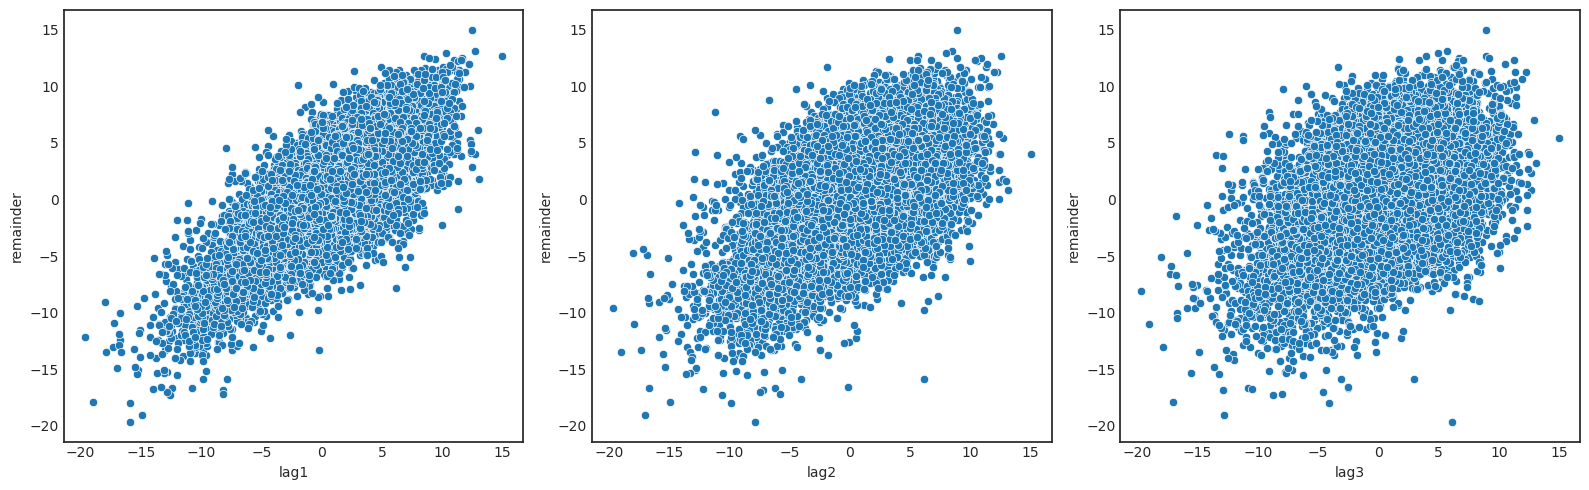

In [41]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style

lag_columns = df2.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df2[lag_columns[i]],y=df2['remainder'],ax=axes[i])
    
plt.tight_layout()

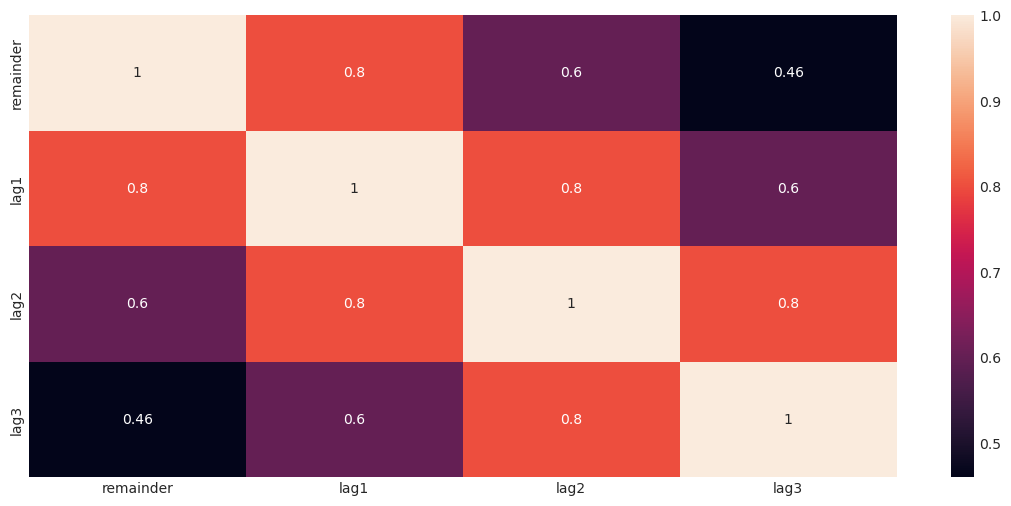

In [42]:
plt.rcParams['figure.figsize'] = (14,6)
sns.heatmap(round(df2.corr(),2), annot=True)
None

In [43]:
df2.dropna(inplace=True)
df2.head()

,remainder,lag1,lag2,lag3
Date,,,,
1950-01-04,0.388707,3.388780,1.488852,-3.011075
1950-01-05,-2.511366,0.388707,3.388780,1.488852
1950-01-06,2.788561,-2.511366,0.388707,3.388780
1950-01-07,5.688489,2.788561,-2.511366,0.388707
1950-01-08,7.488416,5.688489,2.788561,-2.511366


In [44]:
X_remainder = df2.drop(columns=['remainder'])
y_remainder = df2['remainder']

In [45]:
X_remainder

,lag1,lag2,lag3
Date,,,
1950-01-04,3.388780,1.488852,-3.011075
1950-01-05,0.388707,3.388780,1.488852
1950-01-06,-2.511366,0.388707,3.388780
1950-01-07,2.788561,-2.511366,0.388707
1950-01-08,5.688489,2.788561,-2.511366
...,...,...,...
2022-09-26,-1.528488,-3.228416,-4.428343
2022-09-27,-2.228561,-1.528488,-3.228416
2022-09-28,-4.628634,-2.228561,-1.528488


In [46]:
ar_model = LinearRegression()
ar_model.fit(X_remainder,y_remainder)

LinearRegression()

In [47]:
df2['ar_predictions'] = ar_model.predict(X_remainder)

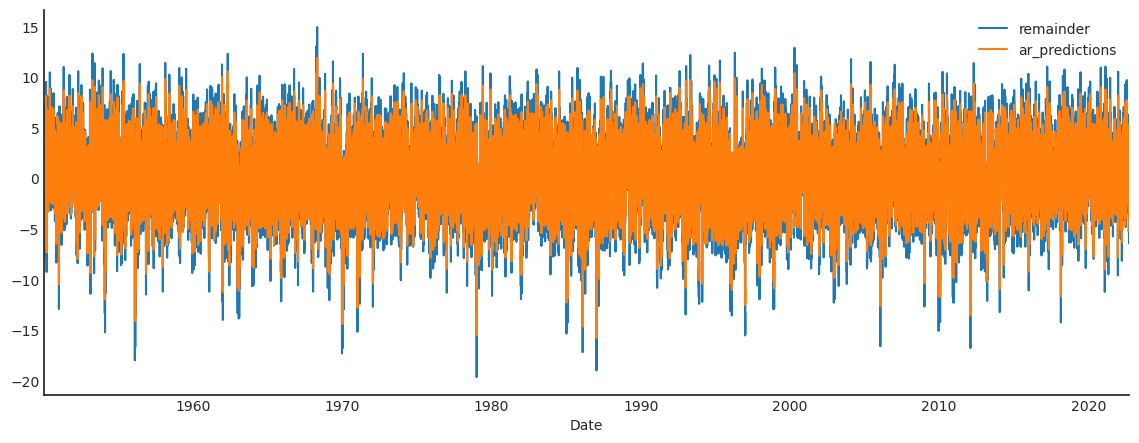

In [48]:
df2[['remainder','ar_predictions']].plot(figsize=(14,5),legend=True)
#df1['Temp'].plot(figsize=(14,5),legend=True)
sns.despine()

In [49]:
#!pip install statsmodels

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

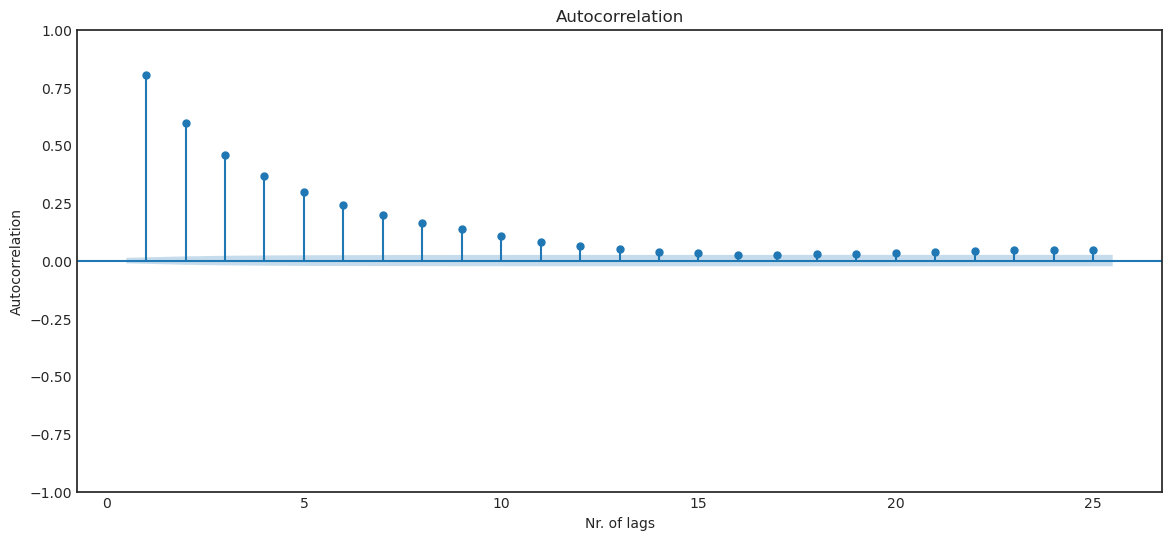

In [51]:
plot_acf(df2['remainder'],zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Autocorrelation')
None

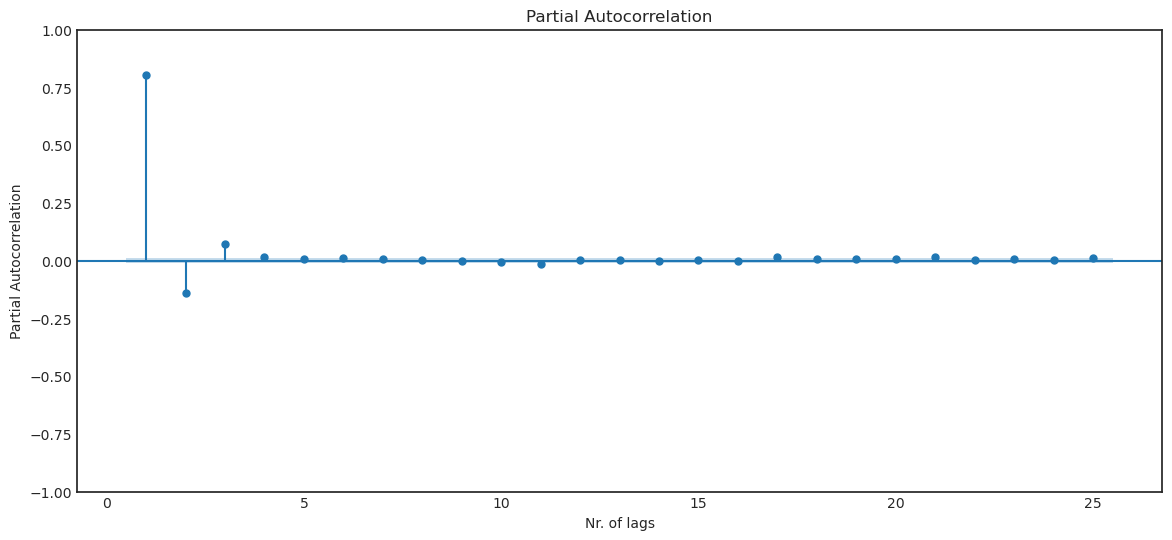

In [52]:
plot_pacf(df2['remainder'],zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Partial Autocorrelation')
None

In [53]:
df2['residuals_ar'] = df2['remainder'] - df2['ar_predictions']

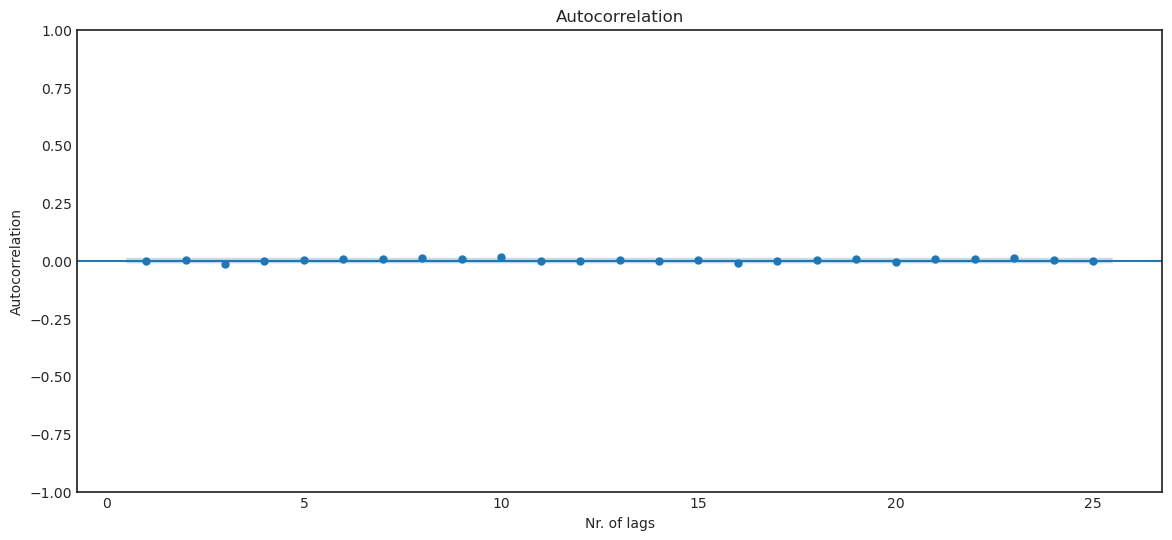

In [54]:
plot_acf(df2['residuals_ar'],zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Autocorrelation')
None

In [55]:
ar_model.score(X_remainder,y_remainder) 

0.6548352226043239

# Run the full model

In [56]:
df2

,remainder,lag1,lag2,lag3,ar_predictions,residuals_ar
Date,,,,,,
1950-01-04,0.388707,3.388780,1.488852,-3.011075,2.608517,-2.219810
1950-01-05,-2.511366,0.388707,3.388780,1.488852,-0.238118,-2.273248
1950-01-06,2.788561,-2.511366,0.388707,3.388780,-2.159832,4.948394
1950-01-07,5.688489,2.788561,-2.511366,0.388707,3.140537,2.547952
1950-01-08,7.488416,5.688489,2.788561,-2.511366,4.506908,2.981508
...,...,...,...,...,...,...
2022-09-26,-2.228561,-1.528488,-3.228416,-4.428343,-1.071094,-1.157467
2022-09-27,-4.628634,-2.228561,-1.528488,-3.228416,-1.987087,-2.641546
2022-09-28,-6.428706,-4.628634,-2.228561,-1.528488,-3.940919,-2.487787


In [57]:
df3 = X.join(df2, lsuffix='remainder')
df3

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,timestep,remainder,lag1,lag2,lag3,ar_predictions,residuals_ar
Date,,,,,,,,,,,,,,,,,,
1950-01-01,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-03,0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,3,0.388707,3.388780,1.488852,-3.011075,2.608517,-2.219810
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,4,-2.511366,0.388707,3.388780,1.488852,-0.238118,-2.273248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0,0,0,0,0,0,0,1,0,0,0,26566,-2.228561,-1.528488,-3.228416,-4.428343,-1.071094,-1.157467
2022-09-27,0,0,0,0,0,0,0,1,0,0,0,26567,-4.628634,-2.228561,-1.528488,-3.228416,-1.987087,-2.641546
2022-09-28,0,0,0,0,0,0,0,1,0,0,0,26568,-6.428706,-4.628634,-2.228561,-1.528488,-3.940919,-2.487787


In [58]:
df3.dropna(inplace=True)

In [59]:
X_full = df3.drop(columns=['residuals_ar', 'ar_predictions', 'remainder'])
y_full = y[3:]

In [60]:
#y[3:]

In [61]:
X_full

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,timestep,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,3,3.388780,1.488852,-3.011075
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,4,0.388707,3.388780,1.488852
1950-01-06,0,0,0,0,0,0,0,0,0,0,0,5,-2.511366,0.388707,3.388780
1950-01-07,0,0,0,0,0,0,0,0,0,0,0,6,2.788561,-2.511366,0.388707
1950-01-08,0,0,0,0,0,0,0,0,0,0,0,7,5.688489,2.788561,-2.511366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0,0,0,0,0,0,0,1,0,0,0,26566,-1.528488,-3.228416,-4.428343
2022-09-27,0,0,0,0,0,0,0,1,0,0,0,26567,-2.228561,-1.528488,-3.228416
2022-09-28,0,0,0,0,0,0,0,1,0,0,0,26568,-4.628634,-2.228561,-1.528488


In [62]:
m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression()

In [63]:
m_full.score(X_full,y_full) 

0.9149374581899545

In [64]:
df3['predictions_full_model'] = m_full.predict(X_full)
df3

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,timestep,remainder,lag1,lag2,lag3,ar_predictions,residuals_ar,predictions_full_model
Date,,,,,,,,,,,,,,,,,,,
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,3,0.388707,3.388780,1.488852,-3.011075,2.608517,-2.219810,2.138168
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,4,-2.511366,0.388707,3.388780,1.488852,-0.238118,-2.273248,-0.707176
1950-01-06,0,0,0,0,0,0,0,0,0,0,0,5,2.788561,-2.511366,0.388707,3.388780,-2.159832,4.948394,-2.628263
1950-01-07,0,0,0,0,0,0,0,0,0,0,0,6,5.688489,2.788561,-2.511366,0.388707,3.140537,2.547952,2.671103
1950-01-08,0,0,0,0,0,0,0,0,0,0,0,7,7.488416,5.688489,2.788561,-2.511366,4.506908,2.981508,4.036822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0,0,0,0,0,0,0,1,0,0,0,26566,-2.228561,-1.528488,-3.228416,-4.428343,-1.071094,-1.157467,14.740744
2022-09-27,0,0,0,0,0,0,0,1,0,0,0,26567,-4.628634,-2.228561,-1.528488,-3.228416,-1.987087,-2.641546,13.825165
2022-09-28,0,0,0,0,0,0,0,1,0,0,0,26568,-6.428706,-4.628634,-2.228561,-1.528488,-3.940919,-2.487787,11.871927


<AxesSubplot:xlabel='Date'>

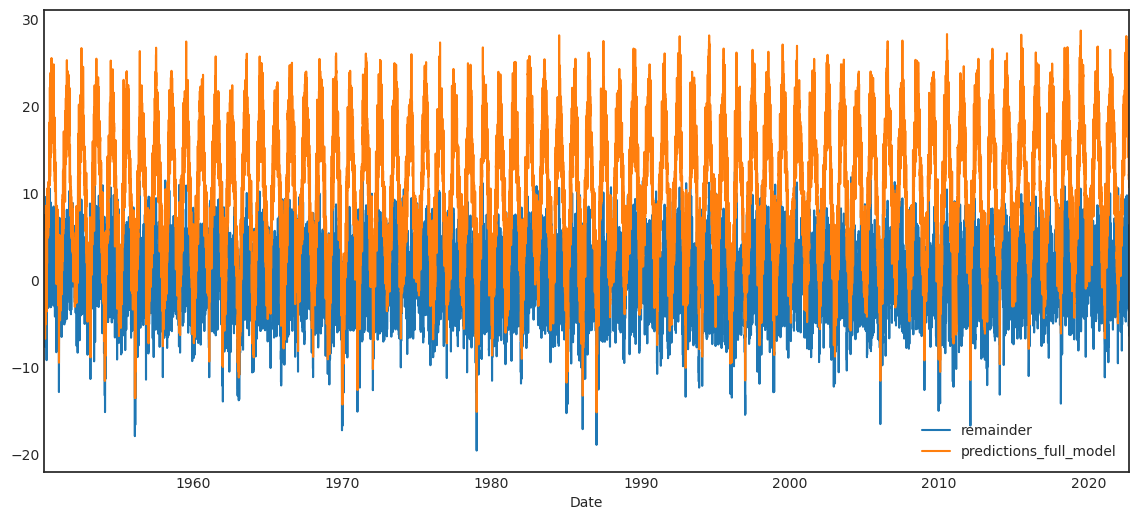

In [65]:
df3[['remainder', 'predictions_full_model']].plot()

# Evaluate our model

In [66]:
X_full

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,timestep,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,3,3.388780,1.488852,-3.011075
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,4,0.388707,3.388780,1.488852
1950-01-06,0,0,0,0,0,0,0,0,0,0,0,5,-2.511366,0.388707,3.388780
1950-01-07,0,0,0,0,0,0,0,0,0,0,0,6,2.788561,-2.511366,0.388707
1950-01-08,0,0,0,0,0,0,0,0,0,0,0,7,5.688489,2.788561,-2.511366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0,0,0,0,0,0,0,1,0,0,0,26566,-1.528488,-3.228416,-4.428343
2022-09-27,0,0,0,0,0,0,0,1,0,0,0,26567,-2.228561,-1.528488,-3.228416
2022-09-28,0,0,0,0,0,0,0,1,0,0,0,26568,-4.628634,-2.228561,-1.528488


In [67]:
y_full

Date
1950-01-04    -0.1
1950-01-05    -3.0
1950-01-06     2.3
1950-01-07     5.2
1950-01-08     7.0
              ... 
2022-09-26    13.6
2022-09-27    11.2
2022-09-28     9.4
2022-09-29     9.6
2022-09-30    10.7
Name: Temp, Length: 26568, dtype: float64

In [68]:
# Create a TimeSeriesSplit object
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
ts_split = TimeSeriesSplit(n_splits=5)

In [69]:
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    print(f"""The training data for the {i+1}th iteration are the observations steps 
    {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps
    {validation_index}""")
    print('\n')

The training data for the 1th iteration are the observations steps 
    [   0    1    2 ... 4425 4426 4427]
The validation data for the 1th iteration are the observations steps
    [4428 4429 4430 ... 8853 8854 8855]


The training data for the 2th iteration are the observations steps 
    [   0    1    2 ... 8853 8854 8855]
The validation data for the 2th iteration are the observations steps
    [ 8856  8857  8858 ... 13281 13282 13283]


The training data for the 3th iteration are the observations steps 
    [    0     1     2 ... 13281 13282 13283]
The validation data for the 3th iteration are the observations steps
    [13284 13285 13286 ... 17709 17710 17711]


The training data for the 4th iteration are the observations steps 
    [    0     1     2 ... 17709 17710 17711]
The validation data for the 4th iteration are the observations steps
    [17712 17713 17714 ... 22137 22138 22139]


The training data for the 5th iteration are the observations steps 
    [    0     1     2 ...

In [70]:
# Create the time series split
time_series_split = ts_split.split(X_full, y_full) 

In [71]:
list(time_series_split)

[(array([   0,    1,    2, ..., 4425, 4426, 4427]),
  array([4428, 4429, 4430, ..., 8853, 8854, 8855])),
 (array([   0,    1,    2, ..., 8853, 8854, 8855]),
  array([ 8856,  8857,  8858, ..., 13281, 13282, 13283])),
 (array([    0,     1,     2, ..., 13281, 13282, 13283]),
  array([13284, 13285, 13286, ..., 17709, 17710, 17711])),
 (array([    0,     1,     2, ..., 17709, 17710, 17711]),
  array([17712, 17713, 17714, ..., 22137, 22138, 22139])),
 (array([    0,     1,     2, ..., 22137, 22138, 22139]),
  array([22140, 22141, 22142, ..., 26565, 26566, 26567]))]

In [72]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result = cross_val_score(estimator=m_full, 
                         X=X_full, y=y_full,
                         cv=ts_split
                       )
result

array([0.91395517, 0.91265411, 0.90320044, 0.9210807 , 0.91920496])

# Test your model

# AutoARIMA

In [73]:
df

,SouID,Temp,Q_Temp
Date,,,
1876-01-01,127488,2.2,0
1876-01-02,127488,2.5,0
1876-01-03,127488,0.3,0
1876-01-04,127488,-5.8,0
1876-01-05,127488,-9.8,0
...,...,...,...
2022-09-26,111448,13.6,0
2022-09-27,111448,11.2,0
2022-09-28,111448,9.4,0


In [74]:
#df['day']=df.index.day
#df

In [75]:
df=df.resample('1M').mean()
df

,SouID,Temp,Q_Temp
Date,,,
1876-01-31,127488.0,-2.070968,0.0
1876-02-29,127488.0,2.389655,0.0
1876-03-31,127488.0,4.964516,0.0
1876-04-30,127488.0,9.833333,0.0
1876-05-31,127488.0,10.270968,0.0
...,...,...,...
2022-05-31,111448.0,15.880645,0.0
2022-06-30,111448.0,20.663333,0.0
2022-07-31,111448.0,20.587097,0.0


In [76]:
df=df['2016':]
df

,SouID,Temp,Q_Temp
Date,,,
2016-01-31,111448.0,0.106452,0.0
2016-02-29,111448.0,4.224138,0.0
2016-03-31,111448.0,5.229032,0.0
2016-04-30,111448.0,9.406667,0.0
2016-05-31,111448.0,16.206452,0.0
...,...,...,...
2022-05-31,111448.0,15.880645,0.0
2022-06-30,111448.0,20.663333,0.0
2022-07-31,111448.0,20.587097,0.0


In [77]:
#df[df['day']==1]

In [78]:
df4 = df['Temp']
df4

Date
2016-01-31     0.106452
2016-02-29     4.224138
2016-03-31     5.229032
2016-04-30     9.406667
2016-05-31    16.206452
                ...    
2022-05-31    15.880645
2022-06-30    20.663333
2022-07-31    20.587097
2022-08-31    22.019355
2022-09-30    14.186667
Freq: M, Name: Temp, Length: 81, dtype: float64

<AxesSubplot:xlabel='Date'>

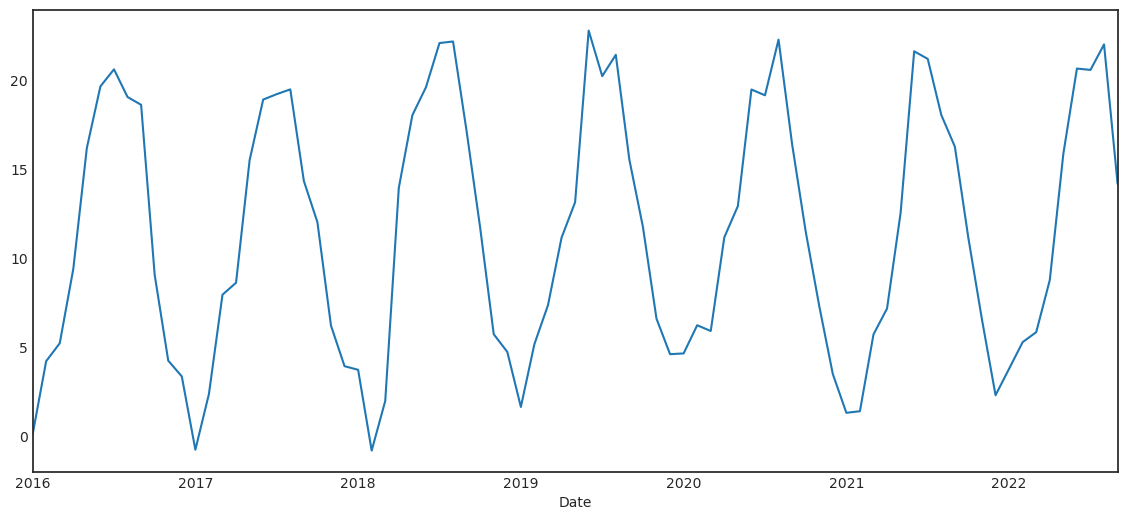

In [79]:
df4.plot()

In [80]:
#np.log(y).diff(12).plot()

In [81]:
arima = pm.AutoARIMA(
    m=12,              # seasonality cycle
    d=1,               # apply differences
    maxiter=1000,
    seasonal=True,
    start_p=1, 
    start_q=1,
    stepwise=True,
    trace=True,
    test='adf' 
)

arima.fit(df4)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=384.410, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=463.081, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=428.440, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=445.322, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=461.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=445.699, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=449.533, Time=0.03 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=430.852, Time=0.17 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=390.010, Time=1.01 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=384.917, Time=0.20 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, T

AutoARIMA(d=1, m=12, maxiter=1000, start_p=1, start_q=1, test='adf', trace=True)

In [82]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -186.205
Date:                            Fri, 11 Nov 2022   AIC                            384.410
Time:                                    22:14:37   BIC                            398.702
Sample:                                         0   HQIC                           390.140
                                             - 81                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.62e-05      0.000      0.188      0.851      -0.000       0.000
ar.L1          0.2522      0.110      2.287      0.022       0.036       0.468
ma.L1         -0.9895      0.087    -11.409      0.000      -1.159      -0.819
ar.S.L12       0.9927      0.016     60.857      0.000       0.961       1.025
ma.S.L12      -0.7432      0.263     -2.823      0.005      -1.259      -0.227
sigma2         4.2714      1.235      3.458      0.001       1.851       6.692
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.66   Prob(JB):                         0.99
Heteroskedasticity (H):               0.41   Skew:                             0.00
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

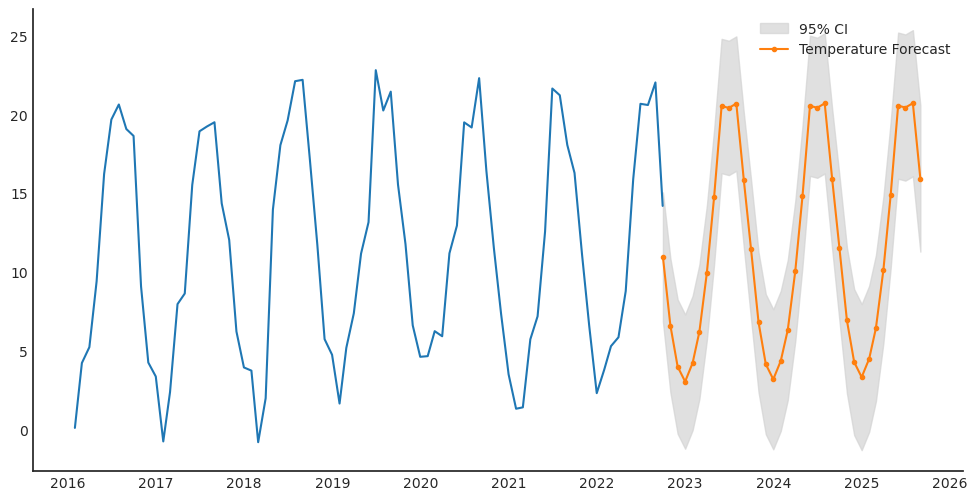

In [83]:
# forecast for the next 5 years with uncertainty area
y_forecast, ci = arima.predict(n_periods=12*3, return_conf_int=True)

# create some date values for the forecast horizon
index_vals = pd.date_range('2022-09-30', '2025-09-01', freq='MS')


plt.figure(figsize=(12,6))
plt.plot(df4.index.values, df4.values)
plt.fill_between(index_vals.values, ci[:,0], ci[:, 1], alpha=0.7, color='lightgrey', label='95% CI')
plt.plot(index_vals.values, y_forecast, label='Temperature Forecast', marker='.')
sns.despine()
plt.legend()